# BITS F312 - Neural Network and Fuzzy Logic



## Assignment 1

In [ ]:
# importing libraries required
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# connecting gdrive to access the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# finding out current working directory
!pwd

/content


In [ ]:
# changing directory to - 'drive/MyDrive/NNFL/Data_A1/'
%cd drive/MyDrive/NNFL/Data_A1/

/content/drive/MyDrive/NNFL/Data_A1


In [ ]:
# defining plotting style
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (14, 14)

#Q3
Repeat question no. Q2 using least angle regression models with BGD, SGD, and
MBGD algorithms. Evaluate MSE, MAE, and CC values for the test data. You can use
grid search to evaluate the optimal parameters of the models. You can divide the
dataset into training, validation, and testing using hold-out cross-validation (70% (training), 10% (validation), and 20% (testing)). For Q3, the data_q2_q3.xlsx file must be used.


### L1-norm regularization (Least angle regression) approach using BGD

In [ ]:
# value predicted from current weights
def pred_BGD_L1(x, w):
  return (np.dot(x,w))

In [ ]:
# cost/loss function
def cost_BGD_L1(y, x, w):
  pred_val = pred_BGD_L1(x,w)
  val = np.sum((pred_val-y)**2)
  return val/(2*(x.shape[0]))

In [ ]:
# weight updation 
def update_BGD_L1(x, y, w, alpha = 0.001, lambd = 0.005):
  w = w - alpha*(np.sum((pred_BGD_L1(x,w)-y).dot(x)))/(x.shape[0]) - (alpha*lambd)*w
  return w

In [ ]:
def MSE(X, Y, W):
  return (np.square((pred_BGD_L1(X, W) - Y))).mean() 

In [ ]:
def MAE(X, Y, W):
  return (np.abs((pred_BGD_L1(X, W) - Y))).mean()

In [ ]:
def CC(X, Y, W):
  Y_pred = pred_BGD_L1(X, W)
  num = np.mean((Y_pred - np.mean(Y_pred))*(Y - np.mean(Y)))
  den = np.sqrt((np.mean(np.square(Y_pred-np.mean(Y_pred))))*(np.mean(np.square(Y-np.mean(Y)))))
  return num/den

In [ ]:
# Batch Gradient Function
def BGD_L1(filename):
  datasetQ2 = pd.read_excel(filename) # dataset for Q2
  # shuffling the data for performing hold-out cross-validation
  df = datasetQ2.sample(frac=1).reset_index(drop=True)
  df_training = df[:70]
  df_validation = df[70:80]
  df_testing = df[80:]

  X_train = (np.array([np.ones(len(df_training)),df_training['Feat1'], df_training['Feat2'], df_training['Feat3'], df_training['Feat4']])).T # Extracting the X vector from the dataset 
  Y_train = (np.array(df_training['Output'])).T # Extracting the Y vector

  X_validation = (np.array([np.ones(len(df_validation)),df_validation['Feat1'], df_validation['Feat2'], df_validation['Feat3'], df_validation['Feat4']])).T # Extracting the X vector from the dataset 
  Y_validation = (np.array(df_validation['Output'])).T # Extracting the Y vector

  X_testing = (np.array([np.ones(len(df_testing)),df_testing['Feat1'], df_testing['Feat2'], df_testing['Feat3'], df_testing['Feat4']])).T # Extracting the X vector from the dataset 
  Y_testing = (np.array(df_testing['Output'])).T # Extracting the Y vector

  
  
  # randomizing intial values of the weights
  W = (np.random.randn((X_train.shape)[1])).T

  ALPHA = 0.001 # declaring the learning rate 

  costs = [] # to save the cost value for each epoch

  EPOCH = 500
  for iteration in range(EPOCH):
    costs.append(cost_BGD_L1(Y_train,X_train,W))
    W = update_BGD_L1(X_train,Y_train,W)
  
  print("Evaluation for Training Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_train,Y_train,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_train,Y_train,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_train,Y_train,W)))

  print("Evaluation for Testing Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_testing,Y_testing,W)))

  print("Evaluation for Validation Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_validation,Y_validation,W)))

  
  # returns the log of values of the cost, and the weights for each iteration as well as the Weight Matrix
  return costs, W 

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_BGD_L1(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Batch Gradient Descent - L1 Regularization) ')

## Output

In [ ]:
costs_BGD_L1, W_BGD_L1  = BGD_L1('data_q2_q3.xlsx')

Evaluation for Training Data
----------------------------
Mean Sqaured Error (MSE): 0.3537669286262443
Mean Absolute Error (MAE): 0.3537669286262443
Correlation Coefficent (CC): 0.015118797987014572
Evaluation for Testing Data
----------------------------
Mean Sqaured Error (MSE): 0.2107765233469535
Mean Absolute Error (MAE): 0.2107765233469535
Correlation Coefficent (CC): 0.19315517482999103
Evaluation for Validation Data
----------------------------
Mean Sqaured Error (MSE): 0.26618096262886815
Mean Absolute Error (MAE): 0.26618096262886815
Correlation Coefficent (CC): 0.1154819276185432


In [ ]:
for val in range(len(W_BGD_L1)):
  print('W{0}: {1}'.format(val, W_BGD_L1[val]))

W0: 0.7525779152627193
W1: -0.7491947335594304
W2: 0.3319576089697603
W3: -0.04878860020465643
W4: 0.28453118926535464


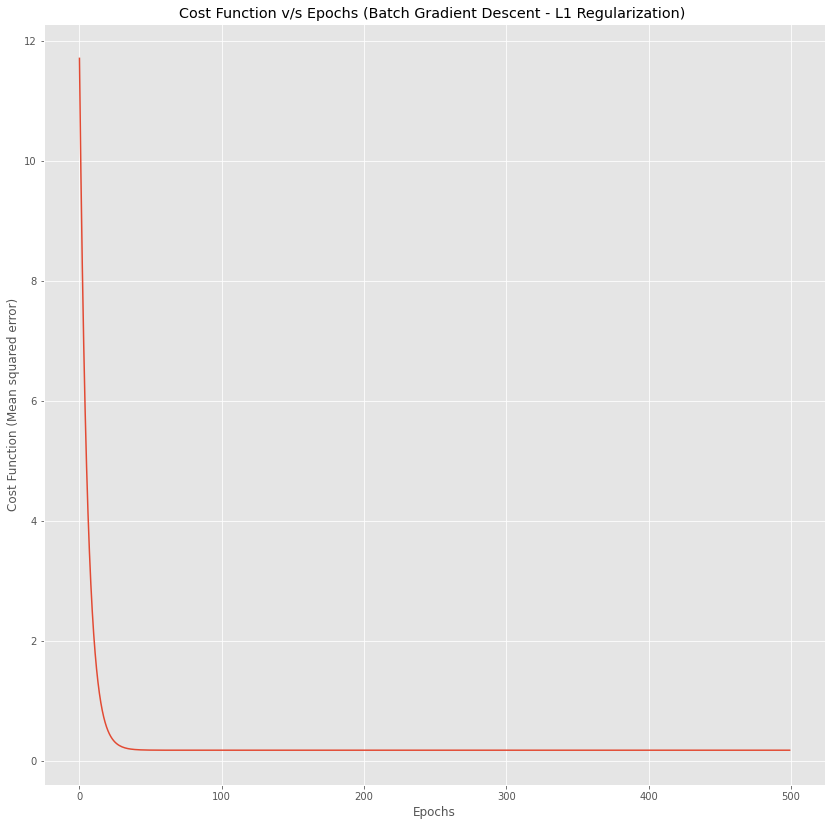

In [ ]:
plot_costs_BGD_L1(costs_BGD_L1)

### L1-norm regularization (Least angle regression) approach using SGD

In [ ]:
# value predicted from current weights
def pred_SGD_L1(x, w):
  return (np.dot(x,w))

In [ ]:
# cost/loss function
def cost_SGD_L1(y, x, w):
  pred_val = pred_SGD_L1(x,w)
  val = np.sum((pred_val-y)**2)
  return val/(2*(x.shape[0]))

In [ ]:
# weight updation 
def update_SGD_L1(x, y, w, alpha = 0.001, lambd = 0.05):

  idx = np.random.randint(0,x.shape[0])
  w = w - alpha*(np.sum((pred_SGD_L1(x[idx],w)-y[idx])*(x[idx])))/(x.shape[0]) - (alpha*lambd)*w
  return w


In [ ]:
def MSE(X, Y, W):
  return (np.square((pred_SGD_L1(X, W) - Y))).mean() 

In [ ]:
def MAE(X, Y, W):
  return (np.abs((pred_SGD_L1(X, W) - Y))).mean()

In [ ]:
def CC(X, Y, W):
  Y_pred = pred_SGD_L1(X, W)
  num = np.mean((Y_pred - np.mean(Y_pred))*(Y - np.mean(Y)))
  den = np.sqrt((np.mean(np.square(Y_pred-np.mean(Y_pred))))*(np.mean(np.square(Y-np.mean(Y)))))
  return num/den

In [ ]:
# Batch Gradient Function
def SGD_L1(filename):
  datasetQ2 = pd.read_excel(filename) # dataset for Q2
  # shuffling the data for performing hold-out cross-validation
  df = datasetQ2.sample(frac=1).reset_index(drop=True)
  df_training = df[:70]
  df_validation = df[70:80]
  df_testing = df[80:]

  X_train = (np.array([np.ones(len(df_training)),df_training['Feat1'], df_training['Feat2'], df_training['Feat3'], df_training['Feat4']])).T # Extracting the X vector from the dataset 
  Y_train = (np.array(df_training['Output'])).T # Extracting the Y vector

  X_validation = (np.array([np.ones(len(df_validation)),df_validation['Feat1'], df_validation['Feat2'], df_validation['Feat3'], df_validation['Feat4']])).T # Extracting the X vector from the dataset 
  Y_validation = (np.array(df_validation['Output'])).T # Extracting the Y vector

  X_testing = (np.array([np.ones(len(df_testing)),df_testing['Feat1'], df_testing['Feat2'], df_testing['Feat3'], df_testing['Feat4']])).T # Extracting the X vector from the dataset 
  Y_testing = (np.array(df_testing['Output'])).T # Extracting the Y vector

  
  
  # randomizing intial values of the weights
  W = (np.random.randn((X_train.shape)[1])).T

  ALPHA = 0.01 # declaring the learning rate 

  costs = [] # to save the cost value for each epoch

  EPOCH = 5000
  for iteration in range(EPOCH):
    costs.append(cost_SGD_L1(Y_train,X_train,W))
    W = update_SGD_L1(X_train,Y_train,W)
  
  print("Evaluation for Training Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_train,Y_train,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_train,Y_train,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_train,Y_train,W)))

  print("Evaluation for Testing Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_testing,Y_testing,W)))

  print("Evaluation for Validation Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_validation,Y_validation,W)))

  
  # returns the log of values of the cost, and the weights for each iteration as well as the Weight Matrix
  return costs, W 

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_SGD_L1(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Stochastic Gradient Descent)')

## Output


In [ ]:
costs_SGD_L1, W_SGD_L1  = SGD_L1('data_q2_q3.xlsx')

Evaluation for Training Data
----------------------------
Mean Sqaured Error (MSE): 0.34019834723826964
Mean Absolute Error (MAE): 0.34019834723826964
Correlation Coefficent (CC): 0.19239502138854445
Evaluation for Testing Data
----------------------------
Mean Sqaured Error (MSE): 0.2740091968177543
Mean Absolute Error (MAE): 0.2740091968177543
Correlation Coefficent (CC): 0.29166664512067725
Evaluation for Validation Data
----------------------------
Mean Sqaured Error (MSE): 0.45378559548979813
Mean Absolute Error (MAE): 0.45378559548979813
Correlation Coefficent (CC): -0.04111134971726688


In [ ]:
for val in range(len(W_SGD_L1)):
  print('W{0}: {1}'.format(val, W_SGD_L1[val]))

W0: -0.8920440451432711
W1: -0.7366351305587308
W2: 0.4050427002574002
W3: 0.011962293865159273
W4: 0.5775941249960369


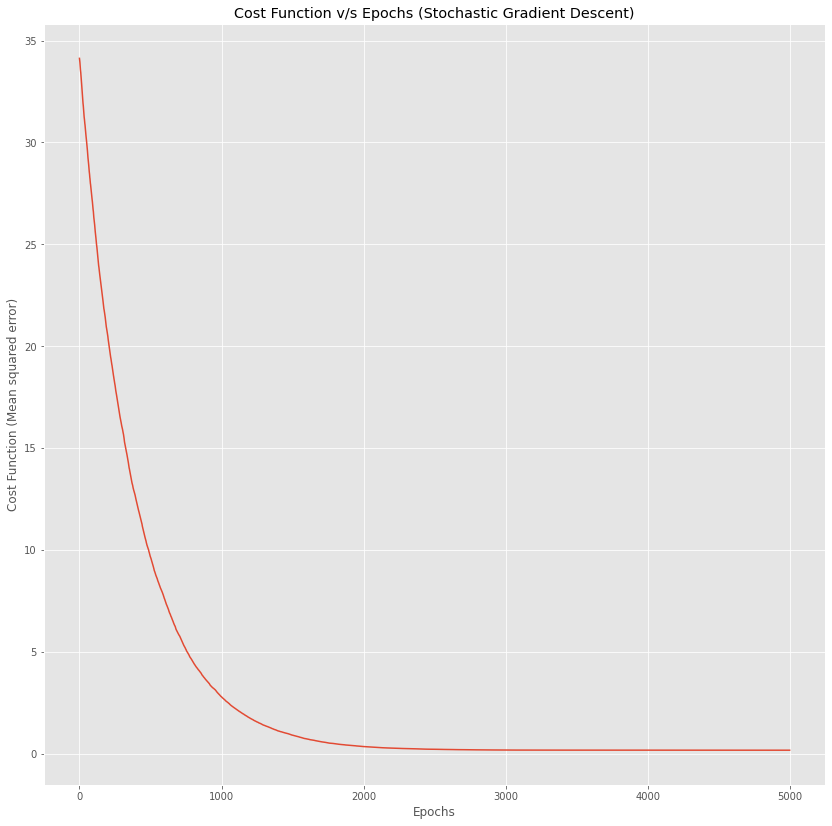

In [ ]:
plot_costs_SGD_L1(costs_SGD_L1)

### L1-norm regularization (Least angle regression) approach using MBGD

In [ ]:
# value predicted from current weights
def pred_MBGD_L1(x, w):
  return (np.dot(x,w))

In [ ]:
# cost/loss function
def cost_MBGD_L1(y, x, w):
  pred_val = pred_MBGD_L1(x,w)
  val = np.sum((pred_val-y)**2)
  return val/(2*(x.shape[0]))

In [ ]:
# weight updation 
def update_MBGD_L1(x, y, w, alpha = 0.001, lambd = 0.005, batch_size = 8):

  idx = np.random.randint(0,x.shape[0], size=batch_size)
  w = w - alpha*(np.sum((pred_MBGD_L1(x[idx],w)-y[idx]).dot(x[idx])))/(x.shape[0]) 

  return w


In [ ]:
def MSE(X, Y, W):
  return (np.square((pred_MBGD_L1(X, W) - Y))).mean() 

In [ ]:
def MAE(X, Y, W):
  return (np.abs((pred_MBGD_L1(X, W) - Y))).mean()

In [ ]:
def CC(X, Y, W):
  Y_pred = pred_MBGD_L1(X, W)
  num = np.mean((Y_pred - np.mean(Y_pred))*(Y - np.mean(Y)))
  den = np.sqrt((np.mean(np.square(Y_pred-np.mean(Y_pred))))*(np.mean(np.square(Y-np.mean(Y)))))
  return num/den

In [ ]:
# Batch Gradient Function
def MBGD_L1(filename):
  datasetQ2 = pd.read_excel(filename) # dataset for Q2
  # shuffling the data for performing hold-out cross-validation
  df = datasetQ2.sample(frac=1).reset_index(drop=True)
  df_training = df[:70]
  df_validation = df[70:80]
  df_testing = df[80:]

  X_train = (np.array([np.ones(len(df_training)),df_training['Feat1'], df_training['Feat2'], df_training['Feat3'], df_training['Feat4']])).T # Extracting the X vector from the dataset 
  Y_train = (np.array(df_training['Output'])).T # Extracting the Y vector

  X_validation = (np.array([np.ones(len(df_validation)),df_validation['Feat1'], df_validation['Feat2'], df_validation['Feat3'], df_validation['Feat4']])).T # Extracting the X vector from the dataset 
  Y_validation = (np.array(df_validation['Output'])).T # Extracting the Y vector

  X_testing = (np.array([np.ones(len(df_testing)),df_testing['Feat1'], df_testing['Feat2'], df_testing['Feat3'], df_testing['Feat4']])).T # Extracting the X vector from the dataset 
  Y_testing = (np.array(df_testing['Output'])).T # Extracting the Y vector

  
  
  # randomizing intial values of the weights
  W = (np.random.randn((X_train.shape)[1])).T

  ALPHA = 0.01 # declaring the learning rate 

  costs = [] # to save the cost value for each epoch

  EPOCH = 5000
  for iteration in range(EPOCH):
    costs.append(cost_MBGD_L1(Y_train,X_train,W))
    W = update_MBGD_L1(X_train,Y_train,W)
  
  print("Evaluation for Training Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_train,Y_train,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_train,Y_train,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_train,Y_train,W)))
  print("----------------------------")

  print("Evaluation for Testing Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_testing,Y_testing,W)))
  print("----------------------------")

  print("Evaluation for Validation Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_validation,Y_validation,W)))
  print("----------------------------")
  
  # returns the log of values of the cost, and the weights for each iteration as well as the Weight Matrix
  return costs, W 

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_MBGD_L1(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Mini Batch Gradient Descent)')

### Output


In [ ]:
costs_MBGD_L1, W_MBGD_L1  = MBGD_L1('data_q2_q3.xlsx')

Evaluation for Training Data
----------------------------
Mean Sqaured Error (MSE): 0.2911655477508776
Mean Absolute Error (MAE): 0.2911655477508776
Correlation Coefficent (CC): 0.2648299229153375
----------------------------
Evaluation for Testing Data
----------------------------
Mean Sqaured Error (MSE): 0.24415825316829362
Mean Absolute Error (MAE): 0.24415825316829362
Correlation Coefficent (CC): 0.1824181686160726
----------------------------
Evaluation for Validation Data
----------------------------
Mean Sqaured Error (MSE): 0.17066784431375898
Mean Absolute Error (MAE): 0.17066784431375898
Correlation Coefficent (CC): 0.6204837203746507
----------------------------


In [ ]:
for val in range(len(W_MBGD_L1)):
  print('W{0}: {1}'.format(val, W_MBGD_L1[val]))

W0: 1.5174034797623035
W1: 0.942944453089206
W2: -0.48269422768896597
W3: 0.12545839872101822
W4: -0.032290855970431694


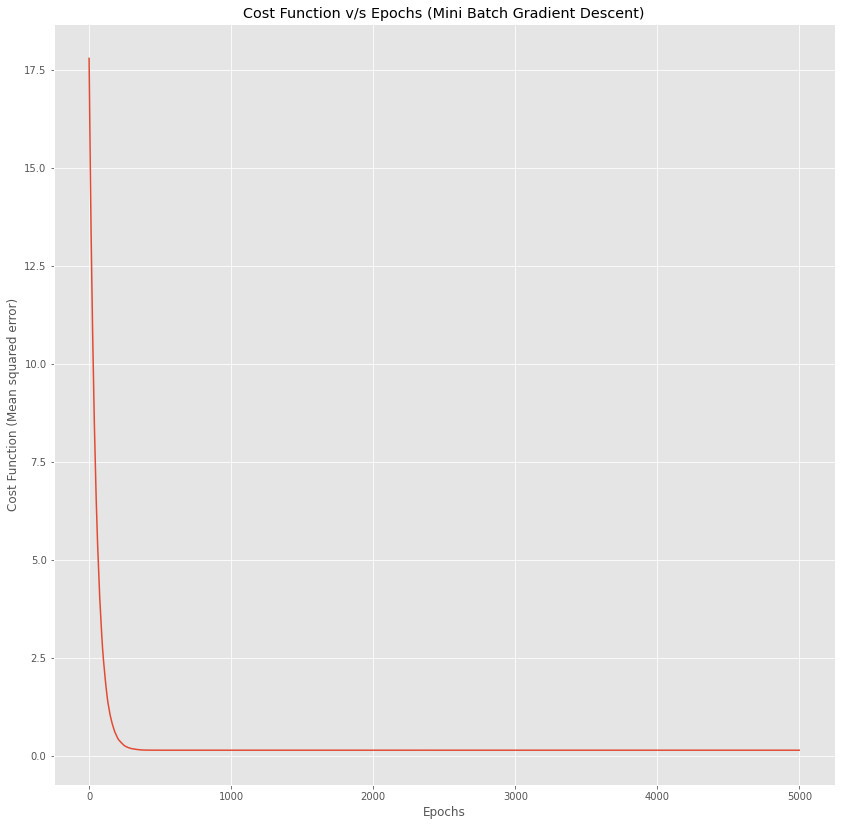

In [ ]:
plot_costs_MBGD_L1(costs_MBGD_L1)